In [19]:
import numpy as np

In [20]:
import os

In [21]:
import ntpath

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col

In [23]:
from matplotlib.ticker import FormatStrFormatter

In [24]:
from power_spec import power_spec as ps

In [25]:
from cpw_resonator import cpw_resonator as cpw

In [26]:
from qkit.analysis import dat_reader as dat

In [27]:
from qkit.analysis.resonator import Resonator as Resonator

In [28]:
from qkit.analysis.circle_fit.circuit import reflection_singleport as rf_p

In [29]:
from qkit.storage import hdf_lib

In [30]:
from tvregdiff import TVRegDiff as tv

In [31]:
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.filters import median_filter

In [32]:
import random

In [123]:
font = {'weight' : 'normal', 'size' : 20}
plt.rc('font', **font)
labelsize=25
linewidth = 2.5
xticks = 22

In [101]:
%matplotlib inline

In [102]:
import scipy.special as ss
import scipy.constants as sc


phi_0 = sc.physical_constants['magn. flux quantum'][0]
c = sc.physical_constants['speed of light in vacuum'][0]   
h = sc.h
hbar = sc.h/(2*np.pi)
e = sc.e 
R_k = h/e**2

In [103]:
Ic1 = 2.0*10**(-6.)
Ic2 = 0.6*Ic1
Isum = Ic1 + Ic2
d = (Ic1 - Ic2)/Isum

In [104]:

def I_asymmetry(t):
    return np.abs(np.cos(np.pi*t))*Isum*(1+d**2.*(np.tan(np.pi*t))**2.)**0.5

#np.cos(np.pi*t)*Isum*np.sqrt(1+d**2*np.tan**2.(np.pi*t))


def I_symmetry(t):
    return Isum*np.abs(np.cos(np.pi*t))



In [105]:
def L_SQUID_sym(t):
    return phi_0/(2.*np.pi*I_symmetry(t))


def L_SQUID_asym(t):
    return phi_0/(2.*np.pi*I_asymmetry(t))

In [106]:
def I_asymmetry2(Ic1,asy,t):
    Ic2 = asy*Ic1
    d = np.abs((Ic1 - Ic2)/(Ic1+Ic2))
    return np.abs(np.cos(np.pi*t))*(Ic1+Ic2)*(1+(d*np.tan(np.pi*t))**2.)**0.5

def I_symmetry2(Ic1,t):
    return 2.*Ic1*np.abs(np.cos(np.pi*t))
    
    
def L_SQUID_sym2(Ic1,t):
    return phi_0/(2.*np.pi*I_symmetry2(Ic1,t))


def L_SQUID_asym2(Ic1,asy,t):
    return phi_0/(2.*np.pi*I_asymmetry2(Ic1,asy,t))

In [107]:
t1 = np.arange(-0.75 , 0.75,0.01)

In [108]:
t3 = np.arange(-2.5,2.5,0.01)

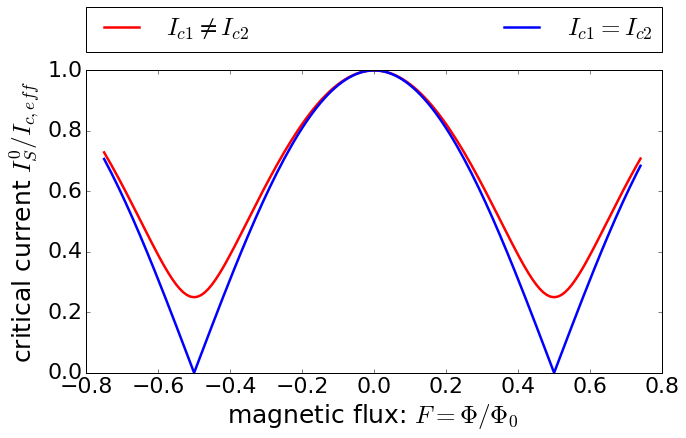

In [109]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_position([0.1,0.15,0.8,0.7])
axes.plot(t1,I_asymmetry(t1)/Isum,'k', label =r"$I_{c1} \neq I_{c2}$", color = 'red', lw = linewidth)
axes.plot(t1,I_symmetry(t1)/Isum, 'k', label =r"$I_{c1} = I_{c2}$", color = 'blue', lw = linewidth)
axes.set_xlabel('magnetic flux: $F =  \Phi / \Phi_0$ ', fontsize = labelsize)
axes.tick_params(labelsize= xticks)
axes.set_ylabel('critical current $I_S^0/I_{c,eff}$', fontsize = labelsize)
axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize =labelsize)
plt.show()

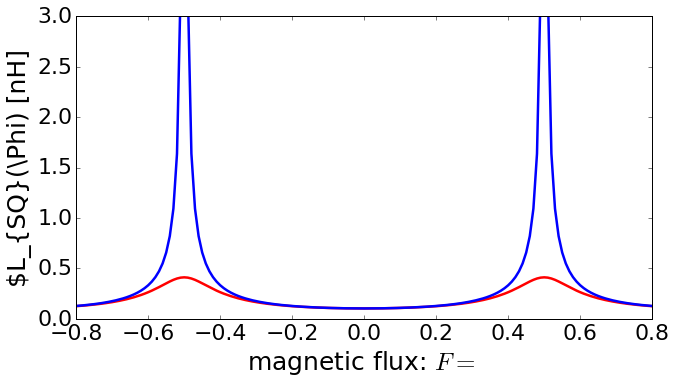

In [110]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_position([0.1,0.14,0.8,0.7])
axes.plot(t3,L_SQUID_asym(t3)*10**9,'k', label =r"$L_{SQ,A}$", color = 'red', lw = linewidth)
axes.plot(t3,L_SQUID_sym(t3)*10**9, 'k', label =r"$L_{SQ,S}$", color = 'blue', lw = linewidth)
axes.set_xlabel('magnetic flux: $F = \frac{\pi\Phi}{\Phi_0}$ ', fontsize = labelsize)
axes.set_ylabel('$L_{SQ}(\Phi) [nH]', fontsize = labelsize)
axes.tick_params(labelsize= xticks)
#axes.set_label(fontsize = 20)
axes.axis([-0.8,0.8,0,3])
#plt.title('SQUID inductance', fontsize = 16)
#axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = labelsize)
plt.show()

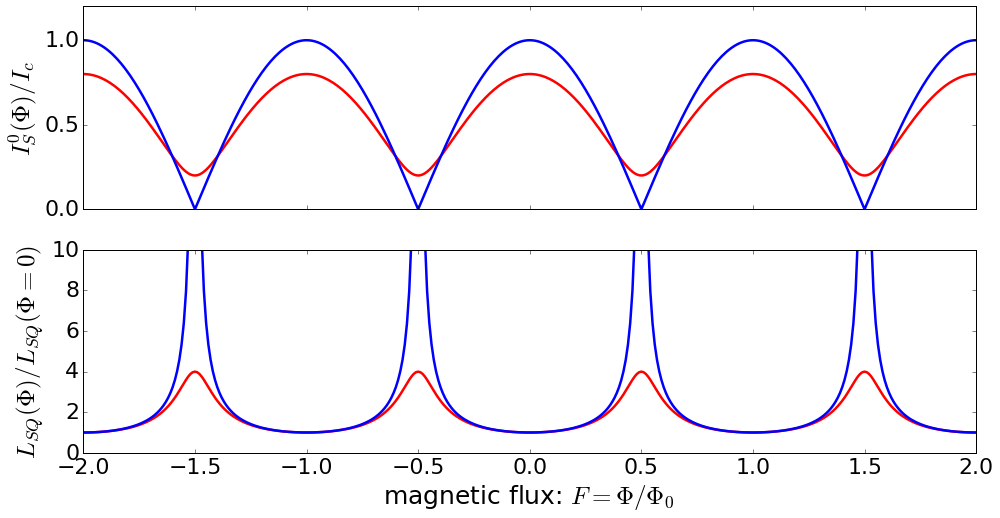

In [111]:
fig, axes = plt.subplots(2, sharex = True, figsize=(16,8))
#axes.set_position([0.1,0.15,0.8,0.7])
axes[0].plot(t3,I_asymmetry(t3)/(2*Ic1),'k', label =r"$I_{c1} \neq I_{c2}$", color = 'red', lw = linewidth)
axes[0].plot(t3,I_symmetry(t3)/Isum, 'k', label =r"$I_{c1} = I_{c2}$", color = 'blue', lw = linewidth)
axes[0].set_ylabel('$I_S^0 (\Phi)/I_{c}$', fontsize = labelsize)
axes[0].tick_params(labelsize= xticks)
axes[0].set_yticks([0,0.2,0.4,0.6,0.8,1.0, 1.2])
axes[1].plot(t3,L_SQUID_asym(t3)/L_SQUID_asym(0),'k', label =r"$L_{SQ,A}$", color = 'red', lw = linewidth)
axes[1].plot(t3,L_SQUID_sym(t3)/L_SQUID_asym(0), 'k', label =r"$L_{SQ,S}$", color = 'blue', lw = linewidth)
axes[1].set_ylabel('$L_{SQ}(\Phi)/L_{SQ}(\Phi = 0)$', fontsize = labelsize)
axes[1].set_xlabel('magnetic flux: $F =  \Phi / \Phi_0$ ', fontsize = labelsize)
axes[1].tick_params(labelsize= xticks)
axes[1].set_xticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
axes[1].set_ylim(0,10.)
axes[0].set_xlim(-2.,2.)
#axes[1].axis([-0.8,0.8,0,3])
#axes[1].axvline(x=0.402, ymin=0, ymax = 1, linewidth=2, color='k')
#axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize =labelsize)
axes[1].set_yticks([0,2,4,6,8,10])
axes[0].set_yticks([0,0.5,1])

In [114]:
t2 = np.arange(-1.5,1.5,0.01)

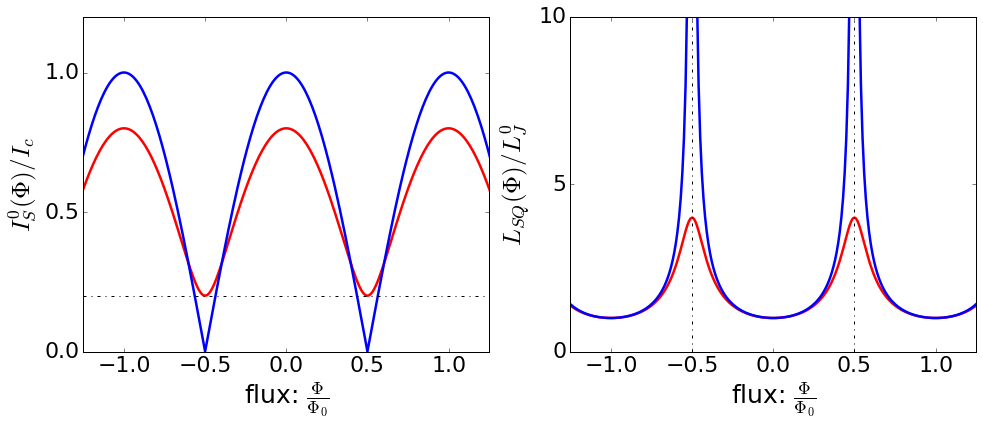

In [143]:
fig, axes = plt.subplots(1,2, sharex = True, figsize=(16,6))
#axes.set_position([0.1,0.15,0.8,0.7])
axes[0].plot(t2,I_asymmetry(t2)/(2*Ic1),'k', label =r"$I_{c1} \neq I_{c2}$", color = 'red', lw = linewidth)
axes[0].plot(t2,I_symmetry(t2)/Isum, 'k', label =r"$I_{c1} = I_{c2}$", color = 'blue', lw = linewidth)
axes[0].set_ylabel(r'$I_S^0 (\Phi)/I_{c}$', fontsize = labelsize)
axes[0].set_xlabel(r'flux: $\frac{\Phi}{\Phi_0}$', fontsize = labelsize)
axes[0].tick_params(labelsize= xticks)
axes[0].set_yticks([0,0.2,0.4,0.6,0.8,1.0, 1.2])
axes[1].plot(t2,L_SQUID_asym(t2)/L_SQUID_asym(0),'k', label =r"$L_{SQ,A}$", color = 'red', lw = linewidth)
axes[1].plot(t2,L_SQUID_sym(t2)/L_SQUID_asym(0), 'k', label =r"$L_{SQ,S}$", color = 'blue', lw = linewidth)
axes[1].set_ylabel(r'$L_{SQ}(\Phi)/L_{J}^0$', fontsize = labelsize)
axes[1].set_xlabel(r'flux: $\frac{\Phi}{\Phi_0}$', fontsize = labelsize)
axes[1].tick_params(labelsize= xticks)
axes[1].set_xticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
axes[1].set_ylim(0,10.)
axes[0].set_xlim(-1.25,1.25)
axes[0].axhline(0.2, ls = '-.', color = 'black', lw = 1.)
axes[1].axvline(-0.5, ls = '-.', color = 'black', lw = 1.)
axes[1].axvline(0.5, ls = '-.', color = 'black', lw = 1.)
#axes[1].axis([-0.8,0.8,0,3])
#axes[1].axvline(x=0.402, ymin=0, ymax = 1, linewidth=2, color='k')
#axes.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize =labelsize)
axes[1].set_yticks([0,5,10])
axes[0].set_yticks([0,0.5,1])

In [142]:
d

0.25

In [141]:
fig.savefig(str('SQUID_IC_LSQ.pdf'), dpi = 400, bbox_inches='tight')

In [79]:
Ic_1 = np.arange(0.5,3.0,0.2)
Ic_11 = np.arange(0.5,3.0,0.05)

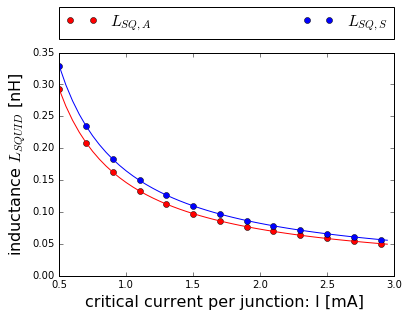

In [80]:
plt.plot(Ic_1,L_SQUID_asym2(Ic_1*10**(-6),1.25,0)*10**(9),'ro', label =r"$L_{SQ,A}$", color = 'red')
plt.plot(Ic_1,L_SQUID_sym2(Ic_1*10**(-6),0)*10**9, 'ro', label =r"$L_{SQ,S}$", color = 'blue')
plt.plot(Ic_11,L_SQUID_asym2(Ic_11*10**(-6),1.25,0)*10**(9),'k', color = 'red')
plt.plot(Ic_11,L_SQUID_sym2(Ic_11*10**(-6),0)*10**9, 'k', color = 'blue')
plt.xlabel('critical current per junction: I [mA] ', fontsize = 16)
plt.ylabel('inductance $L_{SQUID}$ [nH]', fontsize = 16)
#plt.axis([0.4,0.6,0,2])
#plt.title('SQUID inductance', fontsize = 16)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize = 16)
plt.show()